# TACO_dataset_conv Notebook

loads the TACO dataset.
credit: https://github.com/pedropro/TACO/blob/master/demo.ipynb 

new annotations:
credit: https://github.com/wimlds-trojmiasto/detect-waste/blob/main/utils/dataset_converter.py

Load original TACO dataset from lambda server location

In [4]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

dataset_path = '/datasets/TACO-master/data'
anns_file_path = dataset_path + '/' + 'annotations.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

print(dataset.keys())
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

# Load categories and super categories
cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercat
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1

print('Number of super categories:', nr_super_cats)
print('Number of categories:', nr_cats)
print('Number of annotations:', nr_annotations)
print('Number of images:', nr_images)

dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])
Number of super categories: 28
Number of categories: 60
Number of annotations: 4784
Number of images: 1500


Annotations Distribution:

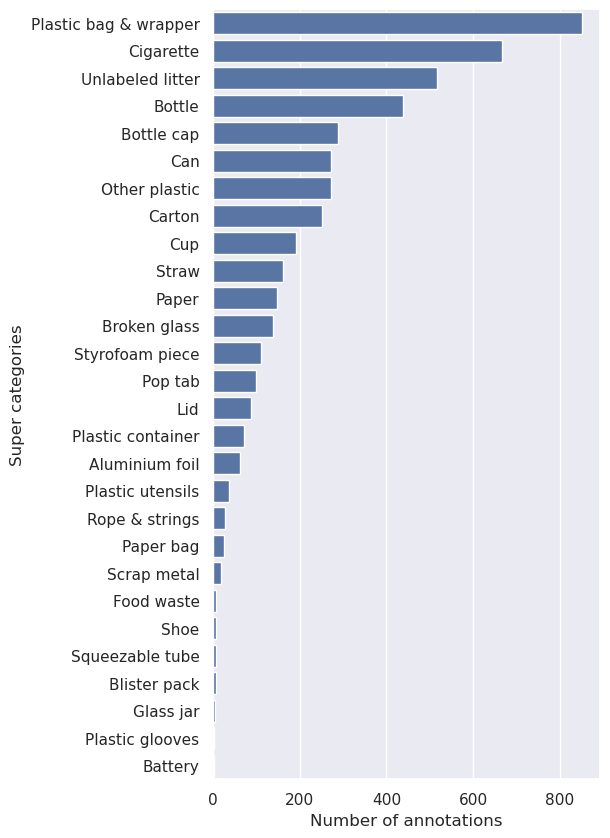

In [5]:
cat_ids_2_supercat_ids = {}
for cat in categories:
    cat_ids_2_supercat_ids[cat['id']] = super_cat_ids[cat['supercategory']]

# Count annotations
super_cat_histogram = np.zeros(nr_super_cats,dtype=int)
for ann in anns:
    cat_id = ann['category_id']
    super_cat_histogram[cat_ids_2_supercat_ids[cat_id]] +=1
    
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,10))

# Convert to DataFrame
d ={'Super categories': super_cat_names, 'Number of annotations': super_cat_histogram}
df = pd.DataFrame(d)
# df = df.sort_values('Number of annotations', 0, False)
df = df.sort_values('Number of annotations', ascending=False)

# sns.set_color_codes("pastel")
# sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Super categories", data=df,
            label="Total", color="b")
#plot_1.set_title('Annotations per super category',fontsize=20)   

Dataset Annotations Converter 

In [1]:
#The following code is utils/dataset_converter.py
# take our dataset of 60 classes and convert it to a datset of 7 classes

import json

#converts a label to belong as part of 1 of 7 possible classes
def taco_to_detectwaste(label):
    # converts taco categories names to detectwaste
    glass = ["Glass bottle", "Broken glass", "Glass jar", "Glass", "glass",
             # open litter map
             "beerBottle", "wineBottle", "juice_bottles", "waterBottle",
              "glass_jar", "ice_tea_bottles", "spiritBottle", ]
    metals_and_plastic = [ # TACO
                          "Aluminium foil", "Clear plastic bottle",
                          "Other plastic bottle", "Plastic bottle cap",
                          "Metal bottle cap", "Aerosol", "Drink can",
                          "Food can", "Drink carton",
                          "Disposable plastic cup",
                          "Other plastic cup", "Plastic lid", "Metal lid",
                          "Single-use carrier bag", "Polypropylene bag",
                          "Plastic Film", "Six pack rings", "Spread tub",
                          "Tupperware", "Disposable food container",
                          "Other plastic container", "Plastic glooves",
                          "Plastic utensils", "Pop tab", "Scrap metal",
                          "Plastic straw", "Other plastic", "Plastic film",
                          "Food Can", "Crisp packet",
                          # Other datasets
                          "plastic", "trash_plastic", 
                          "trash_metal", "HDPEM", "PET", "AluCan", 
                          "metal", "trash_rubber", "rubber", "metals_and_plastic",
                          # open litter map
                          "ice_tea_can", "energy_can", "beerCan", "tinCan",
                          "degraded_plasticbottle", "fizzyDrinkBottle",
                          "milk_bottle",  "plastic_cups", "plasticCutlery", 
                          "plastic_cup_tops", "mediumplastics", "plasticFoodPackaging", 
                          "macroplastics", "plasticAlcoholPackaging", "degraded_plasticbag",
                          "alcohol_plastic_cups", "microplastics", "smoking_plastic",
                          "glass_jar_lid", "crisp_large", "crisp_small", 
                          "aluminium_foil", "bottleTops", "bottleLabel", 
                           ]
    non_recyclable = ["Aluminium blister pack", "Carded blister pack",
                      "Meal carton", "Pizza box", "Cigarette",
                      "Paper cup", "Meal carton", "Foam cup",
                      "Glass cup", "Wrapping paper",
                      "Magazine paper", "Garbage bag",
                      "Plastified paper bag",
                      "Other plastic wrapper", "Foam food container",
                      "Rope", "Shoe", "Squeezable tube", "Paper straw",
                      "Styrofoam piece", "Rope & strings", "Tissues",
                      "trash_fabric", "cloth", "non_recyclable",
                      # open litter map
                      "rope_medium", "tooth_brush", "styro_small",
                      "rope_small", "rope_large", "styro_medium",
                      "styrofoam_plate", "styro_large", "napkins",
                      "election_posters", "paperFoodPackaging"]

    other = ["Battery", "trash_fishing_gear", "other",
             # open litter map
            "batteries", "overflowing_bins", "fishing_gear_nets",
            "dogshit", "elec_large", "chemical", "tyre"]
    paper = ["Corrugated carton", "Egg carton", "Toilet tube",
             "Other carton", "Normal paper", "Paper bag",
             "trash_paper", "paper"]
    bio = ["Food waste","trash_wood", "wood", "bio"]
    unknown = ["Unlabeled litter", "trash_etc", "unknown"]
    ignore = ["rubbish", "Rubbish", "litter"]

    if (label in glass):
        label = "glass"
    elif (label in metals_and_plastic):
        label = "metals_and_plastic"
    elif(label in non_recyclable):
        label = "non_recyclable"
    elif(label in other):
        label = "other"
    elif (label in paper):
        label = "paper"
    elif(label in bio):
        label = "bio"
    elif(label in unknown):
        label = "unknown"
    elif(label in ignore):
        label = "ignore"
    else:
        # print(label, "is non-taco label")
        label = "unknown"
    return label

#same function as above
def label_to_detectwaste(label):
    return taco_to_detectwaste(label)

#source is source dataset, dest is the final new dataset I think?
#Description of function is found below
def taco_categories_to_detectwaste(source, dest):
    # function that updates taco annotations to detectwaste categories
    # from sixty categories to glass, metals_and_plastics, non_recyclable
    # other, paper, bio, unknown

    with open(source, 'r') as f:
        dataset = json.loads(f.read())

    categories = dataset['categories']
    anns = dataset['annotations']
    info = dataset['info']

    # update info about dataset
    info['description'] = 'detectwaste'
    info['year'] = 2021

    # change supercategories and categories from taco to detectwaste
    detectwaste_categories = dataset['categories']
    for ann in anns:
        cat_id = ann['category_id']
        cat_taco = categories[cat_id-1]['name']
        detectwaste_categories[cat_id-1]['supercategory'] = \
            taco_to_detectwaste(cat_taco)

    # bug fix: As there is no representation of
    # "Plastified paper bag" in annotated data,
    # change of this supercategory was done manually.
    try:
        detectwaste_categories[34]['supercategory'] = \
            taco_to_detectwaste("Plastified paper bag")
    except Exception as e:
        print(f"{e}: no plastified paper bag category, ignoring removal")

    detectwaste_ids = {}
    detectwaste_cat_names = []
    cat_id = 1
    for cat in detectwaste_categories:
        if cat['supercategory'] not in detectwaste_ids:
            detectwaste_cat_names.append(cat['supercategory'])
            detectwaste_ids[cat['supercategory']] = cat_id
            cat_id += 1

    # get dictionary to switch ids
    taco_to_detectwaste_ids = {}
    for i, cat in enumerate(detectwaste_categories):
        taco_to_detectwaste_ids[cat['id']] = \
            detectwaste_ids[cat['supercategory']]

    anns_temp = anns.copy()
    anns_detectwaste = anns
    for i, ann in enumerate(anns):
        anns_detectwaste[i]['category_id'] = \
            taco_to_detectwaste_ids[ann['category_id']]
        anns_detectwaste[i].pop('segmentation', None)

    for ann in anns_temp:
        cat_id = ann['category_id']
        try:
            detectwaste_categories[cat_id]['category'] = \
                detectwaste_categories[cat_id]['supercategory']
        except:
            continue
        try:
            detectwaste_categories[cat_id]['name'] = \
                detectwaste_categories[cat_id]['supercategory']
        except:
            continue
        

    anns = anns_detectwaste

    for cat, items in zip(dataset['categories'], detectwaste_ids.items()):
        dataset['categories'] = [cat for cat in dataset['categories']
                                 if cat['id'] < len(detectwaste_ids)]
        category, id = items
        cat['name'] = category
        cat['supercategory'] = category
        cat['category'] = category
        cat['id'] = id

    if dest == None:
        return dataset
    else:
        with open(dest, 'w') as f:
            json.dump(dataset, f)
    #print('Finished converting ids. New ids:', detectwaste_ids)

#same as above
def convert_categories_to_detectwaste(source, dest):
    return taco_categories_to_detectwaste(source, dest)

# Not fully sure what this code is doing but I don't think it is relevant to us
def convert_to_binary(source, dest):
    with open(source, 'r') as f:
        dataset = json.loads(f.read())

    anns = dataset['annotations']
    info = dataset['info']

    # update info about dataset
    info['description'] = 'detectwaste_binary'
    info['year'] = 2021

    # update categories
    categories = dict()
    categories['name'] = 'litter'
    categories['category'] = 'litter'
    categories['id'] = 1
    dataset['categories'] = [categories]

    for i, ann in enumerate(anns):
        anns[i]['category_id'] = int(categories['id'])

    with open(dest, 'w') as f:
        json.dump(dataset, f)

# A more generic version of the above code...I think we could maybe use this if the above code doesn't work
def convert_dataset(annotations_template_path,
                    annotations_to_convert_path,
                    save_path):
    # function converts dataset_to_convert
    # to match categories in dataset_template
    # it is designed to work with detectwaste and epinote categories
    with open(annotations_template_path, 'r') as f:
        dataset_template = json.loads(f.read())
    with open(annotations_to_convert_path, 'r') as f:
        dataset_to_convert = json.loads(f.read())

    template_categories = []
    categories = []
    template_to_new = {}
    template_id_to_new_id = {}

    for i, (template_category,
            category) in enumerate(zip(dataset_template['categories'],
                                       dataset_to_convert['categories'])):
        template_categories.append(template_category['name'])
        categories.append(category['name'])
        template_to_new[category['name']] = template_category['name']
        category['name'] = template_category['name']
        category['category'] = template_category['name']
        category['supercategory'] = ''

    # make a dictionary template_id = new_id
    for template_id, category in enumerate(categories):
        new_id = template_categories.index(category)
        template_id_to_new_id[template_id+1] = new_id+1

    # print('Old categories:', categories)
    # print('New categories:', template_categories)
    for annt in dataset_to_convert['annotations']:
        annt['category_id'] = template_id_to_new_id[annt['category_id']]

    with open(save_path, 'w') as f:
        json.dump(dataset_to_convert, f)

    # print('Finished converting dataset')

#description below. I don't think this function is relevant to us
def concatenate_datasets(list_of_datasets, dest=None):
    # concatenate list of datasets into one single file
    # the first dataset in the list will be used as a base
    # and the rest of datasets will be appended
    last_ann_id = 0
    last_im_id = 0
    concat_dataset = {}
    concat_dataset['images'] = []
    concat_dataset['annotations'] = []

    for i, annot in enumerate(list_of_datasets):
        with open(annot, 'r') as f:
            dataset = json.loads(f.read())

        anns = dataset['annotations'].copy()
        images = dataset['images'].copy()

        img_dict = {}
        for im in images:
            img_dict[im['id']] = last_im_id
            im['id'] = last_im_id
            last_im_id += 1

        for ann in dataset['annotations']:
            ann['image_id'] = img_dict[ann['image_id']]
            ann['id'] = last_ann_id
            last_ann_id += 1

        concat_dataset['images'] += images
        concat_dataset['annotations'] += anns

    concat_dataset['info'] = dataset['info']
    concat_dataset['licenses'] = dataset['licenses']
    concat_dataset['categories'] = dataset['categories']


    if dest is None:
        return concat_dataset
    else:
        with open(dest, 'w') as f:
            json.dump(concat_dataset, f)
        print('Saved results to', dest)

Create new categories Dataset file

In [15]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

dataset_path = '/datasets/TACO-master/data'
anns_file_path = dataset_path + '/' + 'annotations.json'

# Take annotations from path and make into a file
# Then takes content from file and loads it into a python datastructure
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

# print(dataset.keys())
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

# Load categories and super categories
cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercat
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1

# print('Number of super categories:', nr_super_cats)
# print('Number of categories:', nr_cats)
# print('Number of annotations:', nr_annotations)
# print('Number of images:', nr_images)

# new_annotations_path = '/home/tamiroffen/mini_project/project/new_annotations.json'
cwd = os.getcwd()
new_annotations_path = cwd + '/new_annotations.json'

convert_categories_to_detectwaste(anns_file_path, new_annotations_path) 

with open(new_annotations_path, 'r') as f:
    dataset = json.loads(f.read())
    
# print(dataset.keys())
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

# Load categories and super categories
cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercat
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1

# print('Number of super categories:', nr_super_cats)
# print('Number of categories:', nr_cats)
# print('Number of annotations:', nr_annotations)
# print('Number of images:', nr_images)

print(f'created new annotations at {new_annotations_path}')

created new annotations at /home/tamiroffen/mini_project/project/new_annotations.json


Load new dataset file

In [16]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

dataset_path = '/datasets/TACO-master/data'
cwd = os.getcwd()
new_annotations_path = cwd + '/new_annotations.json'
anns_file_path = new_annotations_path

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

print(dataset.keys())
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

# Load categories and super categories
cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0
for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercat
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1

print('Number of super categories:', nr_super_cats)
print('Number of categories:', nr_cats)
print('Number of annotations:', nr_annotations)
print('Number of images:', nr_images)

dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])
Number of super categories: 7
Number of categories: 7
Number of annotations: 4784
Number of images: 1500


new dataset annotations distribution

[2403    2 1351  248  255    8  517]


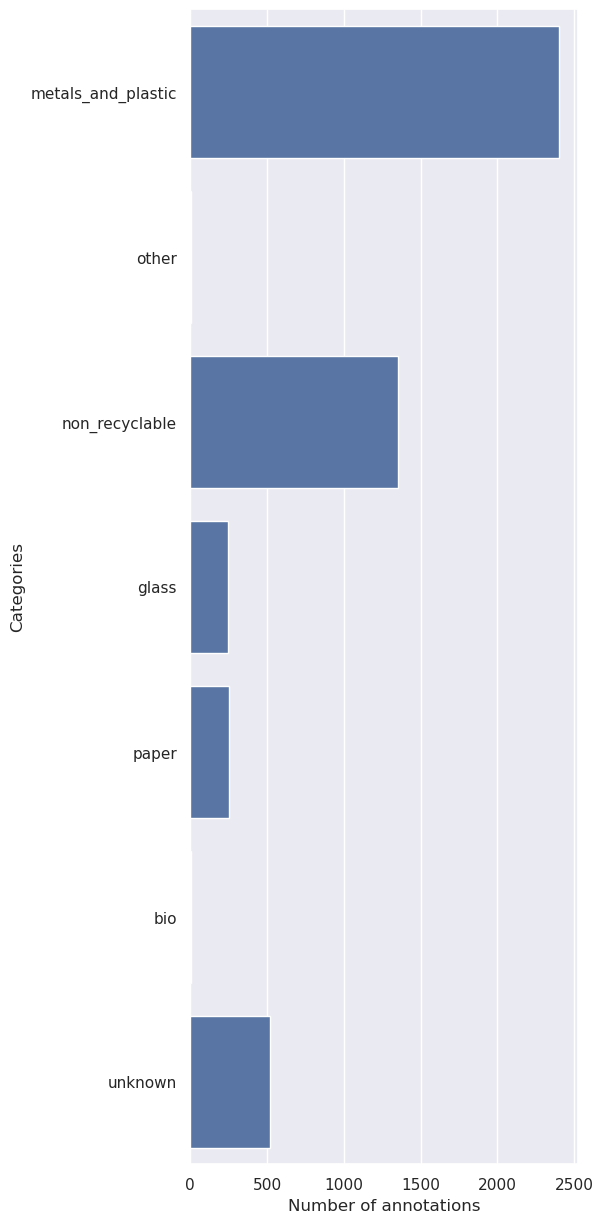

In [17]:
# Count annotations
cat_histogram = np.zeros(nr_cats,dtype=int)
for ann in anns:
    cat_histogram[ann['category_id']-1] += 1
    
print(cat_histogram)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
# df = df.sort_values('Number of annotations', 0, False)
# df = df.sort_values('Number of annotations', ascending=False)

# Plot the histogram
# sns.set_color_codes("pastel")
# sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")

# fig = plot_1.get_figure()
# fig.savefig("output.png")